In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
os.getcwd()


'/home/dev/data_science'

In [2]:
pathlib.Path.home()

NameError: name 'pathlib' is not defined

In [3]:
import pathlib

In [4]:
pathlib.Path.home()

PosixPath('')

 # PyTorch Blitz
 https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

 Date created: 20190728

 ## What is PyTorch?
 https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [5]:
from __future__ import print_function
import torch



In [6]:
x = torch.empty(5,3)
print(x)


tensor([[ 1.4013e-45, -3.6893e+19,  0.0000e+00],
        [ 0.0000e+00,  7.0065e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [7]:
x = torch.rand(5,3)
print(x)


tensor([[0.6573, 0.0246, 0.3697],
        [0.1622, 0.2143, 0.5430],
        [0.4047, 0.3244, 0.2107],
        [0.8633, 0.1424, 0.5357],
        [0.0936, 0.4029, 0.7898]])


In [8]:
x=torch.zeros(5,3,dtype=torch.long)
print(x)


tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [9]:
x=torch.tensor([5.5,3])
print(x)


tensor([5.5000, 3.0000])


In [10]:
x = x.new_ones(5,3,dtype=torch.double) # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float) # override dtype!
print(x)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.9524, -0.6254,  1.2842],
        [ 0.0454,  0.8856, -1.2208],
        [ 1.9811, -0.0722,  0.9810],
        [ 0.3521,  0.7124,  0.6210],
        [-1.0071,  0.5652, -1.6692]])


In [11]:
print(x.size())


torch.Size([5, 3])


In [12]:
y = torch.rand(5,3)
print(x+y)


tensor([[ 1.0195, -0.4238,  1.7545],
        [ 0.7408,  1.0493, -0.8216],
        [ 2.0182,  0.6036,  1.7556],
        [ 1.0789,  0.7822,  0.7518],
        [-0.6090,  0.9683, -1.5039]])


In [13]:
print(torch.add(x,y))


tensor([[ 1.0195, -0.4238,  1.7545],
        [ 0.7408,  1.0493, -0.8216],
        [ 2.0182,  0.6036,  1.7556],
        [ 1.0789,  0.7822,  0.7518],
        [-0.6090,  0.9683, -1.5039]])


In [14]:
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)


tensor([[ 1.0195, -0.4238,  1.7545],
        [ 0.7408,  1.0493, -0.8216],
        [ 2.0182,  0.6036,  1.7556],
        [ 1.0789,  0.7822,  0.7518],
        [-0.6090,  0.9683, -1.5039]])


In [15]:
y.add_(x)  # _ denotes that the tensor y is mutated in-place of the 
print(y)


tensor([[ 1.0195, -0.4238,  1.7545],
        [ 0.7408,  1.0493, -0.8216],
        [ 2.0182,  0.6036,  1.7556],
        [ 1.0789,  0.7822,  0.7518],
        [-0.6090,  0.9683, -1.5039]])


In [16]:
print(x[:,1])


tensor([-0.6254,  0.8856, -0.0722,  0.7124,  0.5652])


In [17]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1,8)  # -1 causes view to infer from other dims
print(x.size(), y.size(), z.size())

x = torch.randn(1)
print(x)
print(x.item())


torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([0.8078])
0.8077532649040222


In [18]:
a = torch.ones(5)
print(a)


tensor([1., 1., 1., 1., 1.])


In [19]:
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)


[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [20]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)


[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [21]:
# Try CUDA: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#cuda-tensors
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
else:
    print("CUDA unavailable.")



CUDA unavailable.


 ## Autograd: Automatic Differentiation
 https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [22]:
import torch


In [23]:
x = torch.ones(2,2, requires_grad=True)
print(x)


tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [24]:
y = x + 2
print(y)


tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [25]:
print(y.grad_fn)


In [26]:
z = y * y * 3
out = z.mean()
print(z, out)


tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [27]:
a = torch.randn(2,2)
a = ((a*3) / (a-1))k
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)



SyntaxError: invalid syntax (<ipython-input-27-5a75a085ff1d>, line 2)

In [28]:
out.backward()


In [29]:
print(x.grad)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


 #### "Generally speaking, torch.autograd is an engine for computing vector-Jacobian product. That is, given any vector v=(v1v2⋯vm)T, compute the product vT⋅J."

In [30]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)


tensor([-1640.2443,   327.8801,  -883.3472], grad_fn=<MulBackward0>)


In [31]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)


tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [32]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print( (x**2).requires_grad )


True
True
False


 ## Neural Networks
 https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

In [33]:
# Feed-forward convolutional NN for MNIST digits classification.

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 sq convolution
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        # affine op: y = Wx + b
        self.fc1 = nn.Linear(16*6*6,120) # 6*6 from dims of image
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square, then only a single number can be specified.
        x = F.max_pool2d( F.relu(self.conv2(x)), 2 )
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]     # all dims except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [34]:
# print the learnable params
params = list(net.parameters())
print(len(params))
print(params[0].size())


10
torch.Size([6, 1, 3, 3])


In [35]:
# random input image
input = torch.randn(1,1,32,32)
out = net(input)
print(out)


tensor([[ 0.0167,  0.0585, -0.0272,  0.0098,  0.0152,  0.1476,  0.0341, -0.0355,
         -0.0926,  0.1199]], grad_fn=<AddmmBackward>)


In [36]:
# zero-out the gradient buffers with random values.
net.zero_grad()
out.backward(torch.randn(1,10))



In [37]:
# Loss function
output = net(input)
target = torch.randn(10)    # dummy target
target = target.view(1,-1)  # make the target the same shape as the output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


tensor(2.0914, grad_fn=<MseLossBackward>)


In [38]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU


In [39]:
net.zero_grad() # zeros-out the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)



conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0245, -0.0180,  0.0128, -0.0112,  0.0403,  0.0174])


In [40]:
# implement SGD (supposedly - where is the stochastic term???)
learning_rate = 0.01

for f in net.parameters():
    f.data.sub_( f.grad.data * learning_rate )



In [41]:
# or use a built-in optimizer
import torch.optim as optim

optimizer = optim.SGD( net.parameters(), lr = learning_rate)

# in training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  # performs update


In [42]:
print(loss)
print(output)


tensor(2.0692, grad_fn=<MseLossBackward>)
tensor([[ 0.0035,  0.0551, -0.0337,  0.0126,  0.0297,  0.1418,  0.0350, -0.0487,
         -0.0911,  0.1253]], grad_fn=<AddmmBackward>)


 ## Training a classifier
 https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms



In [44]:
transform = transforms.Compose(
    [   transforms.ToTensor(),
        transforms.Normalize( (0.5,0.5,0.5), (0.5,0.5,0.5) ) ] )

data_root_path = str(pathlib.Path.home()) + "/home/dev/data_science/practice/PyTorch/data"

trainset    = torchvision.datasets.CIFAR10( root=data_root_path, train=True, download=True, transform=transform )
trainloader = torch.utils.data.DataLoader( trainset, batch_size=4, shuffle=True, num_workers=2 )

testset    = torchvision.datasets.CIFAR10( root=data_root_path, train=False, download=True, transform=transform )
testloader = torch.utils.data.DataLoader( testset, batch_size=4, shuffle=False, num_workers=2 )

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


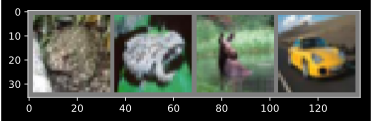

 frog  frog  deer   car


In [45]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow( np.transpose(npimg, (1,2,0) ) )
    plt.show()

# get random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow( torchvision.utils.make_grid(images) )
# print labels
print( " ".join("%5s" % classes[labels[j]] for j in range(4) ) )




In [46]:
import os
os.getcwd()


'/home/dev/data_science'

In [47]:
# ## Define a conv net -- same as before, but taking 3-channel (not 1-channel) images as input.
#
# (note: copy-pasted, not manually transcribed for practice)

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


 ## Define a conv net -- same as before, but taking 3-channel (not 1-channel) images as input.

 (note: copy-pasted, not manually transcribed for practice)

In [48]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()



In [49]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [50]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.155
[1,  4000] loss: 1.809
[1,  6000] loss: 1.657
[1,  8000] loss: 1.589
[1, 10000] loss: 1.538
[1, 12000] loss: 1.452
[2,  2000] loss: 1.403
[2,  4000] loss: 1.363
[2,  6000] loss: 1.329
[2,  8000] loss: 1.312
[2, 10000] loss: 1.272
[2, 12000] loss: 1.273
Finished Training


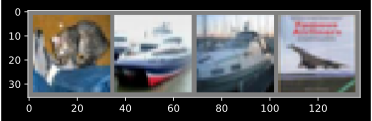

GroundTruth:    cat  ship  ship plane


In [51]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [52]:
outputs = net(images)

In [53]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship  ship  ship plane


In [54]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [55]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 63 %
Accuracy of   car : 74 %
Accuracy of  bird : 47 %
Accuracy of   cat : 25 %
Accuracy of  deer : 41 %
Accuracy of   dog : 44 %
Accuracy of  frog : 60 %
Accuracy of horse : 68 %
Accuracy of  ship : 76 %
Accuracy of truck : 58 %
